# **Análisis inicial de los datos**


In [ ]:
#El primer paso será importar las librerias de Python que necesitaremos para explorar los datos
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
#Pasamos a cargar la base de datos en un dataframe sobre el cual vamos a trabajar
df_fraude= pd.read_csv('fraudes.csv')

#Visualizamos las 10 primeras lineas
df_fraude.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362610,742,TRANSFER,63416.99,C778071008,63416.99,0.0,C1812552860,0.00,0.00,1,0
6362611,742,CASH_OUT,63416.99,C994950684,63416.99,0.0,C1662241365,276433.18,339850.17,1,0
6362612,743,TRANSFER,1258818.82,C1531301470,1258818.82,0.0,C1470998563,0.00,0.00,1,0
6362613,743,CASH_OUT,1258818.82,C1436118706,1258818.82,0.0,C1240760502,503464.50,1762283.33,1,0
6362614,743,TRANSFER,339682.13,C2013999242,339682.13,0.0,C1850423904,0.00,0.00,1,0
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [ ]:
#Usamos el método info para obtener informacion de nuestro dataframe. Obtendremos el numero de columnas, tipo de datos, numero de lineas y más
df_fraude.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
# Nos fijamos si hay registros duplicados
df_fraude.duplicated().sum()

0

Vemos que no hay duplicados, ahora revisamos si hay nulos

In [ ]:
df_fraude.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

Agregamos nuevas columnas a partir de 'step'

In [ ]:

df_fraude['hour'] = df_fraude['step'] % 24
df_fraude['day'] = ((df_fraude['step'] - 1) // 24) % 7 + 1

print(df_fraude['hour'].unique())
print(df_fraude['day'].unique())


[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23  0]
[1 2 3 4 5 6 7]


In [ ]:
# Convertimos 'step' a tipo fecha, considerando cada paso como una hora
start_date = pd.Timestamp('2020-01-01 00:00:00')
df_fraude.loc[:, 'step'] = pd.to_timedelta(df_fraude['step'], unit='h') + start_date

# Cambiamos tipos de datos usando .loc para evitar SettingWithCopyWarning
df_fraude.loc[:, 'type'] = df_fraude['type'].astype('category')
df_fraude.loc[:, 'nameOrig'] = df_fraude['nameOrig'].astype('category')
df_fraude.loc[:, 'nameDest'] = df_fraude['nameDest'].astype('category')
df_fraude.loc[:, 'isFraud'] = df_fraude['isFraud'].astype(bool)
df_fraude.loc[:, 'hour'] = df_fraude['hour'].astype('category')
df_fraude.loc[:, 'day'] = df_fraude['day'].astype('category')


# Eliminamos la columna 'isFlaggedFraud'
df_fraude = df_fraude.drop(columns=['isFlaggedFraud'])

# Verificamos los cambios realizados
print(df_fraude.info())


<ipython-input-14-a34b788b133a>:6: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_fraude_sin_nulos.loc[:, 'type'] = df_fraude_sin_nulos['type'].astype('category')
<ipython-input-14-a34b788b133a>:7: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_fraude_sin_nulos.loc[:, 'nameOrig'] = df_fraude_sin_nulos['nameOrig'].astype('category')
<ipython-input-14-a34b788b133a>:8: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 12 columns):
 #   Column          Dtype         
---  ------          -----         
 0   step            datetime64[ns]
 1   type            category      
 2   amount          float64       
 3   nameOrig        category      
 4   oldbalanceOrg   float64       
 5   newbalanceOrig  float64       
 6   nameDest        category      
 7   oldbalanceDest  float64       
 8   newbalanceDest  float64       
 9   isFraud         bool          
 10  hour            category      
 11  day             category      
dtypes: bool(1), category(5), datetime64[ns](1), float64(5)
memory usage: 626.8 MB
None


In [ ]:
df_fraude.to_csv('Fraudes_limpio.csv', index=False)

Pasamos ahora a realizar un Análisis Exploratorio de Datos (EDA)

1. Distribución de Tipos de Transacción

Podemos comenzar explorando la distribución de los diferentes tipos de transacciones en general y de las fraudulentas en particular.

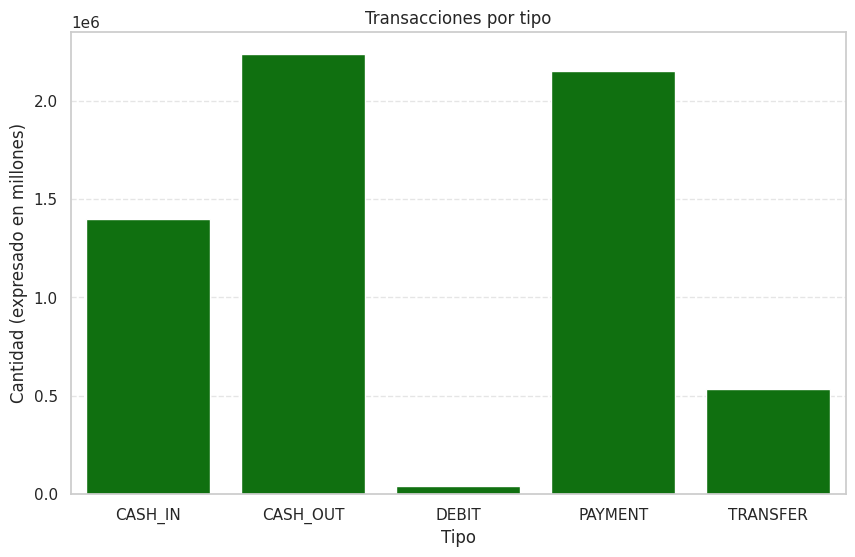

In [ ]:
# Establecer el estilo de seaborn
sns.set(style="whitegrid")

# Distribución de tipos de transacción
# plt.figure(figsize=(10, 6))
# sns.countplot(data=df_fraude_sin_nulos, x='type')
# plt.title('Distribución de Tipos de Transacción')
# plt.xlabel('Tipo de Transacción')
# plt.ylabel('Frecuencia')
# plt.xticks(rotation=45)
# plt.show()

df_per_type = df_fraude.groupby('type').size()

plt.figure(figsize=(10, 6))
sns.barplot(x=df_per_type.index, y=df_per_type, color='green')
plt.title('Transacciones por tipo')
plt.xlabel('Tipo')
plt.ylabel('Cantidad (expresado en millones)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

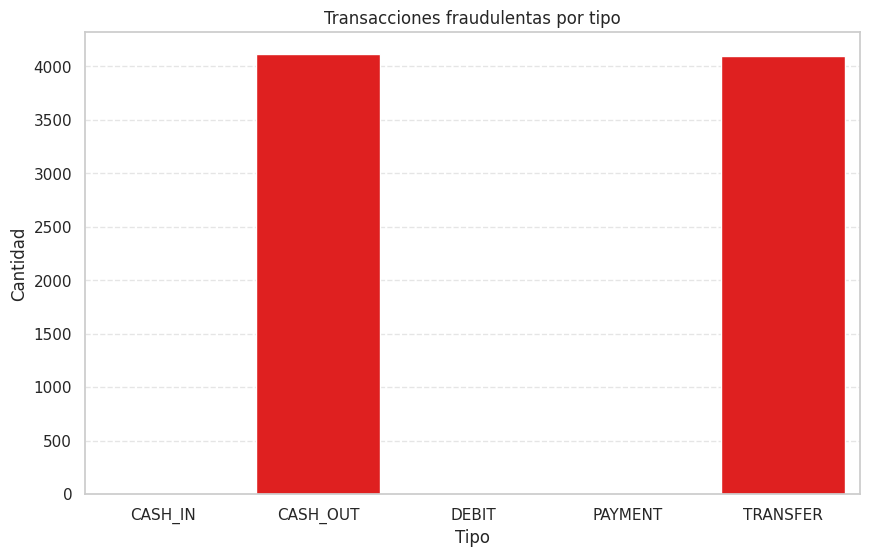

In [ ]:
df_fraudes_por_tipo = df_fraude.groupby('type')['isFraud'].sum()
plt.figure(figsize=(10, 6))
sns.barplot(x=df_fraudes_por_tipo.index, y=df_fraudes_por_tipo, color='red')
plt.title('Transacciones fraudulentas por tipo')
plt.xlabel('Tipo')
plt.ylabel('Cantidad')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

2. Montos de Transacción

Es útil observar la distribución de los montos de las transacciones, tanto en general como filtrados por fraude.

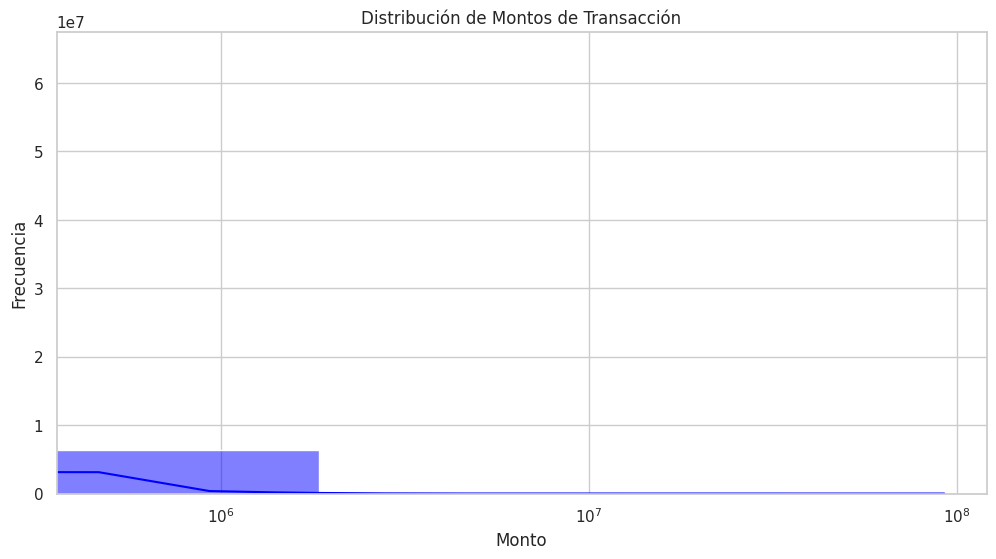

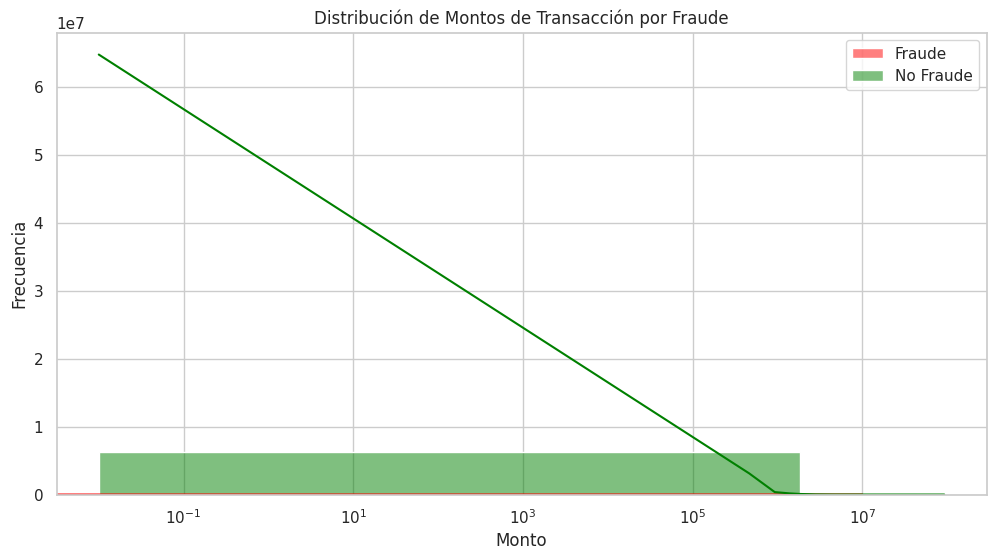

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df_fraude, x='amount', bins=50, kde=True, color='blue')
plt.title('Distribución de Montos de Transacción')
plt.xlabel('Monto')
plt.ylabel('Frecuencia')
plt.xscale('log')  # Escala logarítmica para mejor visualización
plt.show()

# Distribución de montos para transacciones fraudulentas y no fraudulentas
plt.figure(figsize=(12, 6))
sns.histplot(data=df_fraude[df_fraude['isFraud'] == True], x='amount', bins=50, kde=True, color='red', label='Fraude')
sns.histplot(data=df_fraude[df_fraude['isFraud'] == False], x='amount', bins=50, kde=True, color='green', label='No Fraude')
plt.title('Distribución de Montos de Transacción por Fraude')
plt.xlabel('Monto')
plt.ylabel('Frecuencia')
plt.xscale('log')  # Escala logarítmica
plt.legend()
plt.show()

3. Boxplot de Montos por Tipo de Transacción y Fraude

Un boxplot puede ser útil para ver la distribución de montos de transacción por tipo y si son fraudulentas o no.



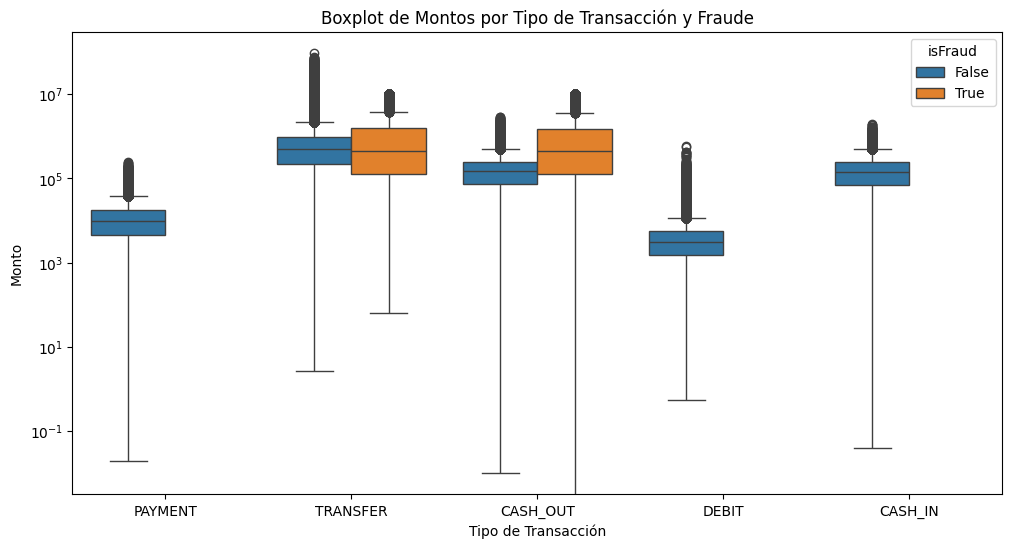

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_fraude, x='type', y='amount', hue='isFraud')
plt.title('Boxplot de Montos por Tipo de Transacción y Fraude')
plt.xlabel('Tipo de Transacción')
plt.ylabel('Monto')
plt.yscale('log')
plt.show()

Para enfocar el Análisis Exploratorio de Datos (EDA) en la detección de fraude y obtener estadísticas relevantes, utilizamos visualizaciones que resaltan las diferencias entre las transacciones fraudulentas y no fraudulentas.

4. Proporción de Transacciones Fraudulentas

Visualizar la proporción de transacciones fraudulentas frente a las no fraudulentas.

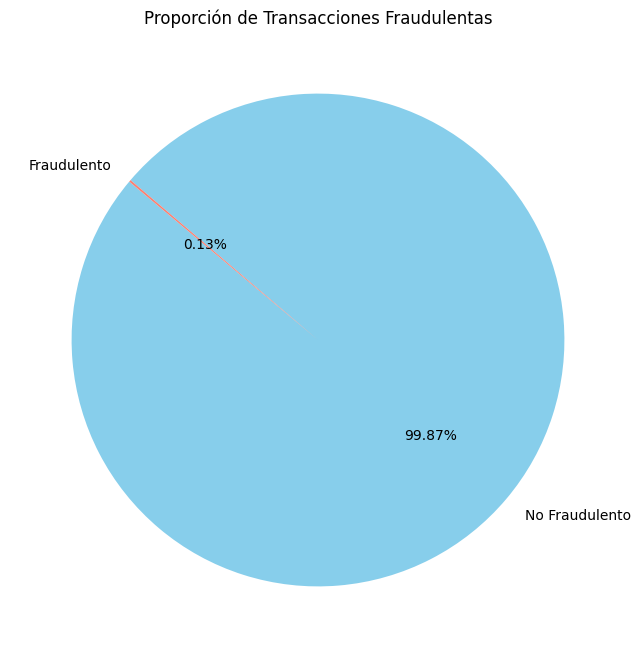

In [ ]:
# Proporción de transacciones fraudulentas vs. no fraudulentas
fraud_counts = df_fraude['isFraud'].value_counts()

# Crear un gráfico de pastel (optamos por ese ya que la proporcion de transaccion fraudulenta es demasiado chica para un grafico de barras)
plt.figure(figsize=(8, 8))
plt.pie(fraud_counts, labels=['No Fraudulento', 'Fraudulento'], autopct='%1.2f%%', startangle=140, colors=['skyblue', 'salmon'])
plt.title('Proporción de Transacciones Fraudulentas')
plt.show()

5. Montos de Transacciones Fraudulentas

Explorar los montos involucrados en las transacciones fraudulentas.

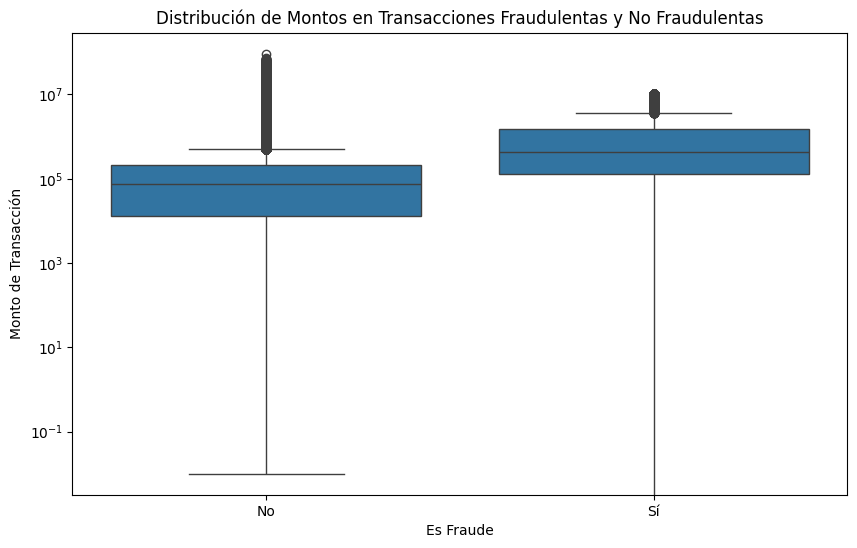

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='isFraud', y='amount', data=df_fraude)
plt.title('Distribución de Montos en Transacciones Fraudulentas y No Fraudulentas')
plt.xlabel('Es Fraude')
plt.ylabel('Monto de Transacción')
plt.yscale('log')
plt.xticks(ticks=[0, 1], labels=['No', 'Sí'])
plt.show()

6. Comparación de Saldos Antes y Después de las Transacciones

Comparar cómo cambian los saldos antes y después de las transacciones, distinguiendo entre transacciones fraudulentas y legítimas.

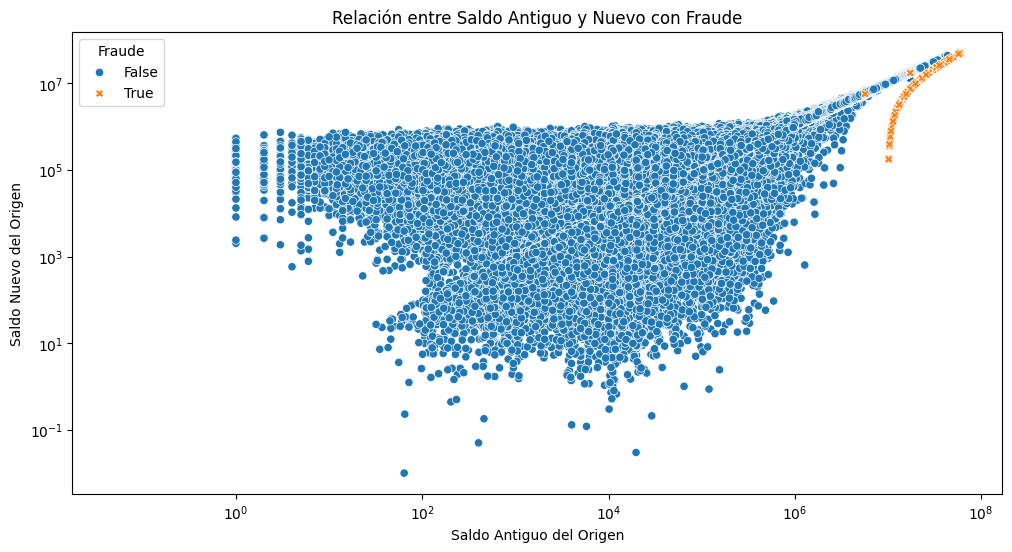

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_fraude, x='oldbalanceOrg', y='newbalanceOrig', hue='isFraud', style='isFraud')
plt.title('Relación entre Saldo Antiguo y Nuevo con Fraude')
plt.xlabel('Saldo Antiguo del Origen')
plt.ylabel('Saldo Nuevo del Origen')
plt.xscale('log')
plt.yscale('log')
plt.legend(title='Fraude')
plt.show()

7. Análisis de la Relación entre Montos de Transacción y Fraude por Tipo de Transacción
Analizar cómo se relacionan los montos de transacción con el fraude, segmentado por tipo de transacción.

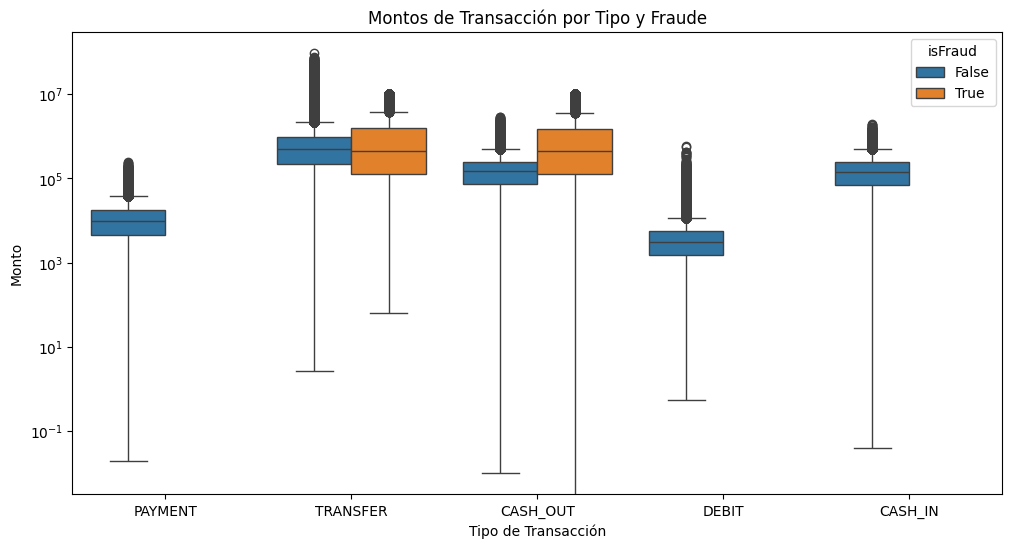

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_fraude, x='type', y='amount', hue='isFraud')
plt.title('Montos de Transacción por Tipo y Fraude')
plt.xlabel('Tipo de Transacción')
plt.ylabel('Monto')
plt.yscale('log')
plt.show()

8. Estadísticas Descriptivas para Transacciones Fraudulentas

Obtener estadísticas descriptivas (como el monto medio de las transacciones fraudulentas, saldos iniciales y finales) puede ofrecer insights adicionales.

In [ ]:
# Filtrar las transacciones fraudulentas
df_fraude = df_fraude[df_fraude['isFraud'] == True]

# Mostrar estadísticas descriptivas para montos de transacciones fraudulentas
print("Estadísticas de Montos para Transacciones Fraudulentas:")
print(df_fraude['amount'].describe())

# Para saldos iniciales y finales
print("\nEstadísticas de Saldos Iniciales y Finales para Transacciones Fraudulentas:")
print(df_fraude[['oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']].describe())

Estadísticas de Montos para Transacciones Fraudulentas:
count    8.213000e+03
mean     1.467967e+06
std      2.404253e+06
min      0.000000e+00
25%      1.270913e+05
50%      4.414234e+05
75%      1.517771e+06
max      1.000000e+07
Name: amount, dtype: float64

Estadísticas de Saldos Iniciales y Finales para Transacciones Fraudulentas:
       oldbalanceOrg  newbalanceOrig  oldbalanceDest  newbalanceDest
count   8.213000e+03    8.213000e+03    8.213000e+03    8.213000e+03
mean    1.649668e+06    1.923926e+05    5.442496e+05    1.279708e+06
std     3.547719e+06    1.965666e+06    3.336421e+06    3.908817e+06
min     0.000000e+00    0.000000e+00    0.000000e+00    0.000000e+00
25%     1.258224e+05    0.000000e+00    0.000000e+00    0.000000e+00
50%     4.389835e+05    0.000000e+00    0.000000e+00    4.676420e+03
75%     1.517771e+06    0.000000e+00    1.478287e+05    1.058725e+06
max     5.958504e+07    4.958504e+07    2.362305e+08    2.367265e+08
